Berikut merupakan catatan dari awal pengerjaan hingga selesai agar lebih sistematis untuk dilaporkan
1. Data Preparation Tes
* Importing data: Melakukan import data_retail.csv ke python environment.
* Cleansing data: Melakukan pembersihan dan modifikasi data sehingga siap digunakan untuk analisis lebih lanjut.

2. Data visualization test: Mendapatkan insight dari hasil visualisasi yang telah dibuat.
3. Basic stats method test: Mendapatkan insight dari model dan evaluasi model yang sudah dibuat dan diuji.

# Data Preparation 

Importing Data

In [1]:
# Download dataset
#https://raw.githubusercontent.com/AriesRmd/Business-Decision-Research/master/data_retail.csv
!wget --no-check-certificate \
    https://raw.githubusercontent.com/AriesRmd/Business-Decision-Research/master/data_retail.csv \
    -O /content/data_retail.csv

--2023-01-04 12:09:39--  https://raw.githubusercontent.com/AriesRmd/Business-Decision-Research/master/data_retail.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6324421 (6.0M) [text/plain]
Saving to: ‘/content/data_retail.csv’

/content/data_retai 100%[===================>]   6.03M  --.-KB/s    in 0.03s   

2023-01-04 12:09:40 (214 MB/s) - ‘/content/data_retail.csv’ saved [6324421/6324421]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/data_retail.csv', sep=';')

In [4]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 non-null  int64 
 6   Average_Transaction_Amount  100000 non-null  int64 
 7   Count_Transaction           100000 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 6.1+ MB


## Data Cleansing

Ada 2 kolom yang seharusnya bertipe datetime, yaitu : First_Transaction dan Last_Transaction.
1. Mengubah type data dari 2 kolom tersebut

In [6]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,1466304274396,1538718482608,1467681,22
1,2,2,29531,Sepatu,1406077331494,1545735761270,1269337,41
2,3,3,141526,Tas,1493349147000,1548322802000,310915,30
3,4,4,141526,Jaket,1493362372547,1547643603911,722632,27
4,5,5,37545,Sepatu,1429178498531,1542891221530,1775036,25


In [7]:
#Kolom First_Trans
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit ='s', origin = '1970-01-01')

#Kolom Last_Trans
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit ='s', origin = '1970-01-01')

In [8]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25


### Churn Customer

Customer churn, juga dikenal sebagai atrisi pelanggan, adalah persentase pelanggan yang berhenti menggunakan produk dan layanan bisnis selama jangka waktu tertentu

Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah

1. transaksi paling terakhir kapan dilakukan
2. klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.

In [9]:
# Mengecek transaksi terakhir
max(df['Last_Transaction'])

Timestamp('2019-02-01 23:57:57.286000128')

In [10]:
#Mencari customer yang berstatus churn atau tidak dengan boolean, lalu membuat kolom baru bernama 'is_churn'
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

In [11]:
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


Kemudian, untuk memudahkan dalam pengambilan keputusan kita bisa menggunakan syntax df[‘is_churn’] untuk mengklasifikasikan manakah customer yang termasuk customer churn atau tidak dengan logika ‘TRUE’ and ‘FALSE’

TRUE = konsumen yang melakukan transaksi terakhir kurang dari tanggal 01 Agustus 2018

FALSE = konsumen yang melakukan transaksi terakhir lebih dari tanggal 01 Agustus 2018

### Label Encoding

Mengubah value kolom is_churn menjadi nilai numerik dengan menggunakan Label Encoder. Hal ini dilakukan agar nantinya ketika masuk ke bagian Data Visualization dapat mengetahui proporsi customer churn setiap kategori produknya.

In [12]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [13]:
LE = LabelEncoder()
df['is_churn'] = LE.fit_transform(df['is_churn'])
LE.classes_
print(np.sort(df['is_churn'].unique()))

[0 1]


Sehingga, berdasarkan outputnya terlihat angka 0 diwakili logika False (bukan customer churn) dan angka 1 diwakili logika True yang artinya tergolong customer churn.

### Menghapus Kolom Yang Tidak Diperlukan
Selanjutnya, kita akan menghapus kolom yang tidak diperlukan yaitu kolom ‘no’ dan ‘Row_Num’

In [14]:
del df['no']
del df['Row_Num']

# Coding Test: Data Visualization
Membuat visualisasi data berupa trend of customer acquisition by year dengan menggunakan bar chart. Untuk itu kita buat feature/kolom tambahan yang merupakan tahun dari First_Transaction dan tahun dari Last_Transaction masing-masingnya dengan nama Year_First_Transaction dan Year_Last_Transaction sebelum melakukan visualisasi.

In [15]:
import matplotlib.pyplot as plt
#Membuat kolom baru yang berisi tahun transaksi pertama dan akhir 
#Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

#Kolom tahun Transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

In [16]:
df.head()

,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn,Year_First_Transaction,Year_Last_Transaction
0,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,0,2016,2018
1,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,0,2014,2018
2,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,0,2017,2019
3,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,0,2017,2019
4,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,0,2015,2018


##Customer acquisition by year

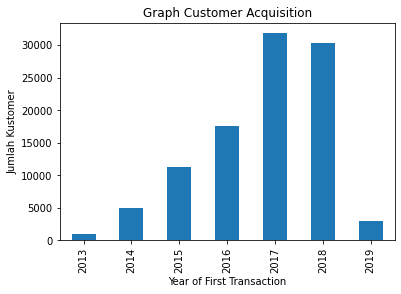

In [17]:
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x = 'Year_First_Transaction', y = 'Customer_ID', kind = 'bar', title = 'Graph Customer Acquisition')

plt.xlabel('Year of First Transaction')
plt.ylabel('Jumlah Kustomer')
plt.show()

Customer acquisition adalah proses penarikan pelanggan ke layanan yang kamu tawarkan atau pelanggan pertama kali ber transaksi. 

Proses ini sangat berguna, terutama untuk perkembangan bisnismu dalam jangka panjang

1. Berdasarkan visualisasi bar chart, dapat disimpulkan bahwa number of customer tertinggi diraih pada tahun 2017 sebesar 30000. Sedangkan yang memiliki number of customer terendah terjadi pada tahun 2013.

##Transaction by Year
Visualisasikanlah trend jumlah transaksi per tahunnya dengan menggunakan bar chart.

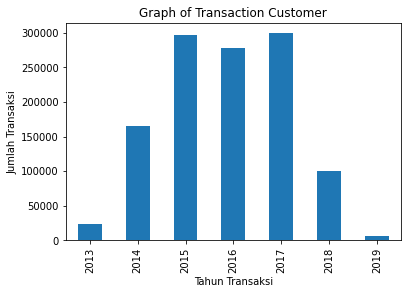

In [18]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x = 'Year_First_Transaction', y = 'Count_Transaction', kind = 'bar', title = 'Graph of Transaction Customer')

plt.xlabel('Tahun Transaksi')
plt.ylabel('Jumlah Transaksi')
plt.show()

Berdasarkan visualisasi bar chart, Jumlah Kustomer sejalan dengan Jumlah Transaksi. Hal ini terlihat pada tahun 2017 yakni sama sama meningkat baik transaksi maupun konsumennya. Hal serupa juga dialami dan terjadi pada tahun 2015 sebelumnya.



##Average transaction amount by year
Dengan menggunakan seaborn pointplot, visualisasikanlah tren dari tahun ke tahun rata-rata jumlah transaksi untuk tiap-tiap produknya.

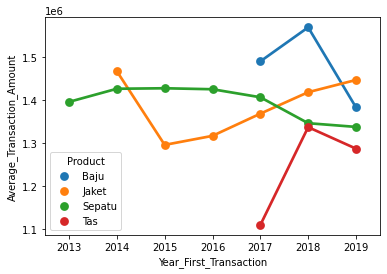

In [19]:
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(), x = 'Year_First_Transaction', y = 'Average_Transaction_Amount', hue = 'Product')

plt.show()

Berdasarkan rata-rata transaksi, beberapa produk mengalami kecenderungan naik-turun. Namun juga konstan seperti produk sepatu

##Proporsi churned customer untuk setiap produk / Kustomer yang menghentikan pembeliannya.

Dari sisi churned customer, khususnya untuk melihat seberapa besar proporsi churned customer untuk tiap-tiap produk dapat diketahui insight-nya melalui pie chart. Visualisasikan pie chartnya untuk keempat produk yang dimaksudkan.

In [20]:
# Pivot data, membuat table baru berisikan kolom is churn dan produk yang telah dipisah menjadi kolom baru, lalu di count jumlahnya
df_piv = df.pivot_table(index = 'is_churn', columns = 'Product',values = 'Customer_ID',aggfunc = 'count', fill_value=0)

#Mendapatkan Proportion Churn by Product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index



In [21]:
df_piv


Product,Baju,Jaket,Sepatu,Tas
is_churn,,,,
0,1268,11123,16064,4976
1,2144,23827,33090,7508


In [22]:
plot_product

Index(['Baju', 'Jaket', 'Sepatu', 'Tas'], dtype='object', name='Product')

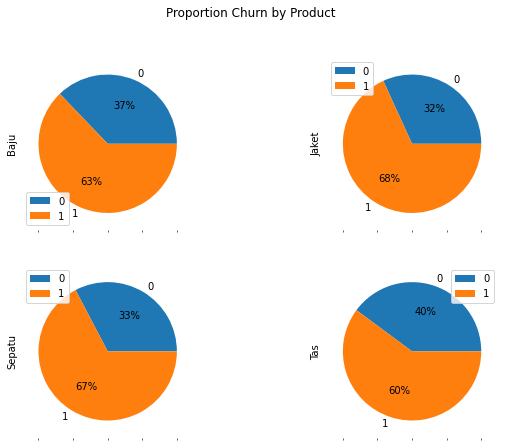

In [23]:
#Plotting pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True, figsize = (10, 7), layout = (-1,2),
                autopct = '%1.0f%%',
                title = 'Proportion Churn by Product')
plt.show()

Berdasarkan visualisasi pie chart, seperti yang telah kita jelaskan sebelumnya bahwa ngka 0 diwakili logika False (bukan customer churn) dan angka 1 diwakili logika True yang artinya tergolong customer churn. Terlihat bahwa hampir keseluruhan produk memiliki customer churn. Artinya :
1. Konsumen sudah mulai berhenti untuk menggunakan layanan atau menghentikan pembeliannya (sudah bukan pelanggan). 
2. Rentang customer churn keseluruhan produk berkisar 60–68%.

Kira-kira apa penyebabnya ya? Hal ini diakibatkan konsumen sudah agak sedikit beralih ke produk lain.

# Tentang Churn, Solusi
Dilansir dari laman Glints, Alasan utama mengapa customer churn rate penting adalah persentase pelanggan yang hilang tersebut sangat memengaruhi growth rate perusahaan. Sebagai contoh, kamu memiliki ember berisi batu. Tiba-tiba, ada lubang yang menyebabkan banyak batu berjatuhan. Mengisi ember tersebut agar kembali penuh dengan batu yang berserakan akan memakan waktu, biaya, dan tenaga tambahan.

Dilansir dari CleverTap, memperoleh pelanggan baru secara umum akan lebih mahal 5–25 kali lipat jika dibandingkan dengan mempertahankan mereka yang sudah ada. Maka dari itu, sebelum mengisi batu ke dalam ember, kamu perlu mengetahui di mana letak lubangnya, kenapa bisa ada lubang di situ, dan seterusnya.

Solusi yang bisa dilakukan: kita bisa memanfaatkan 32–40% yang tergolong kedalam bukan customer churn untuk fokus kepada pelanggan setia produk DQLab Sport Center dengan memfokuskan tenaga, biaya, dan juga waktu pada pelanggan yang sudah terbukti setia.

#Data Visualization Part 2

##Distribusi kategorisasi count transaction
Selanjutnya akan melakukan visualisasi dari distribusi kategorisasi count transaction. Kategorisasi ini dilakukan dengan mengelompokkan jumlah transaksi seperti yang diperlihatkan oleh tabel berikut:

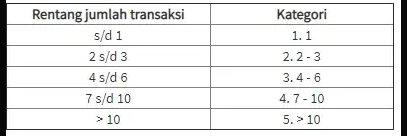

In [24]:
plt.clf()
#Membuat fungsi kategorisasi jumlah transaksi
def func(row):
  if row['Count_Transaction'] == 1:
    val = '1.1'
  elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
    val = '2.2 - 3'
  elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
    val = '3.4 - 6'
  elif (row['Count_Transaction'] > 7 and row['Count_Transaction'] <= 10):
    val = '4.7 - 10'
  else:
    val = '5. >10'
  return val

<Figure size 432x288 with 0 Axes>

In [25]:
# Membuat kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

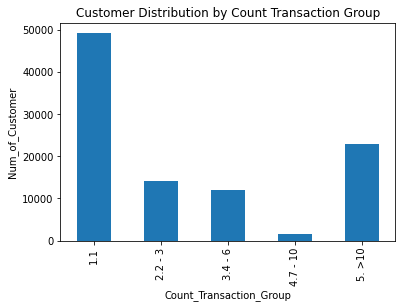

In [26]:
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title = 'Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.show()

Setelah diketahui melalui visualisasi bar chart dalam distribusi kategori transaksi yang dilakukan, ternyata jumlah transaksi mereka hanya terjadi sekali (paling dominan). Sedangkan yang terendah adalah konsumen yang melakukan transaksi 7–10 kali dalam pembeliannya.

##Distribusi kategorisasi average transaction amount
Selanjutnya, akan melakukan visualisasi dari distribusi kategorisasi average transaction amount. Kategorisasi ini dilakukan dengan mengelompokkan rata-rata besar transaksi seperti yang diperlihatkan oleh tabel berikut:


In [27]:
plt.clf()
#Kategori rata-rata besar transaksi
def f(row):
  if(row['Average_Transaction_Amount'] >= 100000 and row ['Average_Transaction_Amount'] <=200000):
    val = '1. 100.000 - 250.000'
  elif(row['Average_Transaction_Amount'] > 250000 and row ['Average_Transaction_Amount'] <=500000):
    val = '2. 250.000 - 500.000'
  elif(row['Average_Transaction_Amount'] > 500000 and row ['Average_Transaction_Amount'] <=750000):
    val = '3. 500.000 - 750.000'
  elif(row['Average_Transaction_Amount'] > 750000 and row ['Average_Transaction_Amount'] <=1000000):
    val = '4. 750.000 - 1.000.000'
  elif(row['Average_Transaction_Amount'] > 1000000 and row ['Average_Transaction_Amount'] <=2500000):
    val = '5. 1.000.000 - 2.500.000'
  elif(row['Average_Transaction_Amount'] > 2500000 and row ['Average_Transaction_Amount'] <=5000000):
    val = '6. 2.500.000 - 5.000.000'
  elif(row['Average_Transaction_Amount'] > 5000000 and row ['Average_Transaction_Amount'] <=10000000):
    val = '7. >5.000.000 - 10.000.000'
  else:
    val = '8. >10.000.000'
  return val







<Figure size 432x288 with 0 Axes>

In [28]:
#Menambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

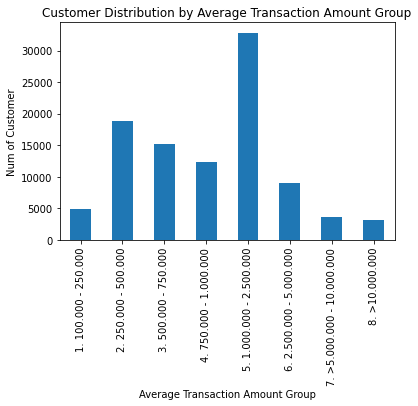

In [29]:
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x= 'Average_Transaction_Amount_Group', y= 'Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average Transaction Amount Group')
plt.ylabel('Num of Customer')
plt.show()

Berdasarkan output visualisasi bar chart, rata-rata besar transaksi terjadi pada rentang angka > 1.000.000 hingga 2.500.000.

#Coding Test: Modelling

##Feature Columns dan Target
Di bagian ini, selanjutnya akan menentukan feature columns dari dataset yang dimiliki, di sini dipilih kolom Average_Transaction_Amount, Count_Transaction, dan Year_Diff. Akan tetapi, kolom terakhir belum ada. Membuat kolom Year_Diff ini dan kemudian assign dataset dengan feature columns ini sebagai variabel independent X.

Untuk target tentunya persoalan costumer dengan kondisi churn atau tidak, assign dataset untuk target ini ke dalam variabe dependent y.

Membuat 2 variabel array X dan Y, isi array X dengan data feature(Variabel Independent) dan dan array Y dengan data target(Variabel Dependent).

In [30]:
#Feature Column: Year_Diff
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']

#Nama - nama feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']

# X independent variabel
X = df[feature_columns]

# y dependent variabel
y = df['is_churn']

In [31]:
print( X)
# print('\nKolom Targer', y)

       Average_Transaction_Amount  Count_Transaction  Year_Diff
0                         1467681                 22          2
1                         1269337                 41          4
2                          310915                 30          2
3                          722632                 27          2
4                         1775036                 25          3
...                           ...                ...        ...
99995                      298662                  1          0
99996                      349556                  1          0
99997                      598013                  1          0
99998                     1208591                  1          0
99999                      486710                  1          0

[100000 rows x 3 columns]


##Split X dan y ke dalam bagian training dan testing
Setelah variabel independent X dan variabel dependent y selesai dilakukan, maka pecahlah X dan y ke dalam bagian training dan testing. Bagian testing 25% dari jumlah entri data

In [32]:
# Melakukan splitting data train dan data test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.30, random_state=0)

##Data Standarization

In [33]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
# evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def classification_eval (aktual, prediksi, name):
    cm = confusion_matrix(aktual, prediksi)
    tp = cm[1][1]
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    
    accuracy = round((tp+tn) / (tp+tn+fp+fn) * 100, 2)
    precision = round((tp) / (tp+fp) * 100, 2)
    recall = round((tp) / (tp+fn) * 100, 2)
    
    print('===== Evaluation Model: {} ====='.format(name))
    print(cm)
    print("")
    print('Accuracy   :', accuracy, '%')
    print('Precision  :', precision, '%')
    print('Recall     :', recall, '%')

#Training Model

In [35]:
# Machine Learning's Library
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

##Logistic Regression

In [36]:
logReg = LogisticRegression(penalty='l2')
logReg.fit(X_train, y_train)

y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

classification_eval(y_train, y_train_pred, 'Logistic Regression')

print('\r')

classification_eval(y_test, y_test_pred, 'Logistic Regression')

===== Evaluation Model: Logistic Regression =====
[[ 9559 13808]
 [ 2939 43694]]

Accuracy   : 76.08 %
Precision  : 75.99 %
Recall     : 93.7 %

===== Evaluation Model: Logistic Regression =====
[[ 4150  5914]
 [ 1227 18709]]

Accuracy   : 76.2 %
Precision  : 75.98 %
Recall     : 93.85 %


In [37]:
y_test_pred = logReg.predict(X_test)
classification_eval(y_test, y_test_pred, 'logistic regression Testing')

===== Evaluation Model: logistic regression Testing =====
[[ 4150  5914]
 [ 1227 18709]]

Accuracy   : 76.2 %
Precision  : 75.98 %
Recall     : 93.85 %


##Random Forest

In [38]:
ranFor = RandomForestClassifier(max_depth=3, criterion='entropy')
ranFor.fit(X_train, y_train)

y_train_pred = ranFor.predict(X_train)
y_test_pred = ranFor.predict(X_test)

classification_eval(y_train, y_train_pred, 'random forest Training')

print('\r')

classification_eval(y_test, y_test_pred, 'random forest Testing')

===== Evaluation Model: random forest Training =====
[[10417 12950]
 [ 3176 43457]]

Accuracy   : 76.96 %
Precision  : 77.04 %
Recall     : 93.19 %

===== Evaluation Model: random forest Testing =====
[[ 4517  5547]
 [ 1343 18593]]

Accuracy   : 77.03 %
Precision  : 77.02 %
Recall     : 93.26 %


## Artificial Neural Network

In [40]:
#Initialising ANN
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [41]:
#Adding 1,2,3 Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [42]:
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [43]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [46]:
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 10)

Epoch 1/10
2344/2344 [==============================] - 8s 3ms/step - loss: 0.5316 - accuracy: 0.7691
Epoch 2/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5318 - accuracy: 0.7688
Epoch 3/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5316 - accuracy: 0.7689
Epoch 4/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5316 - accuracy: 0.7691
Epoch 5/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5315 - accuracy: 0.7691
Epoch 6/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5315 - accuracy: 0.7691
Epoch 7/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5315 - accuracy: 0.7691
Epoch 8/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5313 - accuracy: 0.7692
Epoch 9/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.5313 - accuracy: 0.7690
Epoch 10/10
2344/2344 [==============================] - 7s 3ms/step - loss: 0.531

##Error saat training
Membahas : the problem is that you are applying a metric (accuracy) that is inappropriate for your model (LinearRegression): if you are in a classification setting, you should change your model (e.g. use LogisticRegression instead); if you are in a regression (i.e. numeric prediction) setting, you should change the metric

https://stackoverflow.com/questions/38015181/accuracy-score-valueerror-cant-handle-mix-of-binary-and-continuous-target

In [ ]:
y_train_pred = ann.predict(X_train)
y_test_pred = ann.predict(X_test)

classification_eval(y_train, y_train_pred, 'random forest Training')

print('\r')

classification_eval(y_test, y_test_pred, 'random forest Testing')

In [ ]:
# models = []
# models.append(('SVM', svm.SVC()))
# models.append(('LR', LogisticRegression()))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
#===================================dibawah ini bukan untuk masalah klasifikasi (0/1)
#models.append(('SGDRegressor', linear_model.SGDRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('BayesianRidge', linear_model.BayesianRidge())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('LassoLars', linear_model.LassoLars())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('ARDRegression', linear_model.ARDRegression())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('PassiveAggressiveRegressor', linear_model.PassiveAggressiveRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('TheilSenRegressor', linear_model.TheilSenRegressor())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets
#models.append(('LinearRegression', linear_model.LinearRegression())) #ValueError: Classification metrics can't handle a mix of binary and continuous targets

#Masih eror

##SVM

In [39]:
svm = SVC(kernel='linear') 
svm.fit(X_train,y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

classification_eval(y_train, y_train_pred, 'svm Training')

print('\r')

classification_eval(y_test, y_test_pred, 'svm Testing')

===== Evaluation Model: svm Training =====
[[ 9906 13461]
 [ 3408 43225]]

Accuracy   : 75.9 %
Precision  : 76.25 %
Recall     : 92.69 %

===== Evaluation Model: svm Testing =====
[[ 4288  5776]
 [ 1390 18546]]

Accuracy   : 76.11 %
Precision  : 76.25 %
Recall     : 93.03 %


##Hyperparameter Tuning

###Random Forest

In [54]:
# Library untuk Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=10,
           shuffle=True,
           random_state=1)

In [70]:
hyper_ranFor = dict(max_depth=[1,2,3,4,5], criterion=['gini','entropy'])

ranFor = RandomForestClassifier()

clf = GridSearchCV(ranFor, hyper_ranFor, cv=10)
best_model = clf.fit(X,y)

In [73]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [71]:
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best criterion:', best_model.best_estimator_.get_params()['criterion'])

Best max_depth: 1
Best criterion: gini


In [75]:
y_test_pred = best_model.predict(X_test)
classification_eval(y_test, y_test_pred, 'random forest Testing')

===== Evaluation Model: random forest Testing =====
[[    7 10057]
 [    0 19936]]

Accuracy   : 66.48 %
Precision  : 66.47 %
Recall     : 100.0 %


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


###SVM

In [41]:
# Library untuk Tuning
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(n_splits=10,
           shuffle=True,
           random_state=1)

In [ ]:
from sklearn.svm import SVC
hyper_svm = dict(kernel=['rbf', 'poly'], C=[0.1, 1, 10])

svm = SVC()

clf = GridSearchCV(svm, hyper_svm, cv=10)
best_model = clf.fit(X,y)

In [ ]:
best_model.best_estimator_.get_params()

In [ ]:
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
y_test_pred = best_model.predict(X_test)
classification_eval(y_test, y_test_pred, 'logistic regression Testing')